# Fit successful? True
# 2017-09-19 12:33:58.491966
# Units: cal/mol
# Fit type: bayesian
#   bayesian: Burn in: 0.1
#   bayesian: Final sample number: 1800000
#   bayesian: Initial walker spread: 0.0001
#   bayesian: Num steps: 20000
#   bayesian: Num threads: 1
#   bayesian: Num walkers: 100
#   bayesian: Use ML guess: True
# AIC: -229.73670913329175
# AICc: -221.16528056186317
# BIC: -197.86338346706697
# F: 537.5070489459929
# Rsq: 0.991504660614038
# Rsq_adjusted: 0.9896005328206327
# df: 59
# ln(L): 128.86835456664588
# num_obs: 72
# num_param: 13
type,name,exp_file,value,stdev,bot95,top95,fixed,guess,lower_bound,upper_bound
global,global_K1,NA,2.17521e+06,2.00223e+06,3.72558e+05,6.97776e+06,False,2.00000e+06,-inf,inf
global,global_K2,NA,3.43836e+11,3.28246e+11,6.23643e+10,1.17873e+12,False,1.00000e+10,-inf,inf
global,global_dH1,NA,-1.38753e+03,2.99432e+02,-1.78502e+03,-7.15186e+02,False,-1.00000e+03,-inf,inf
global,global_dH2,NA,-4.63596e+03,5.38726e+02,-5.66522e+03,-3.67285e+03

/home/luke/virtual_environments/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


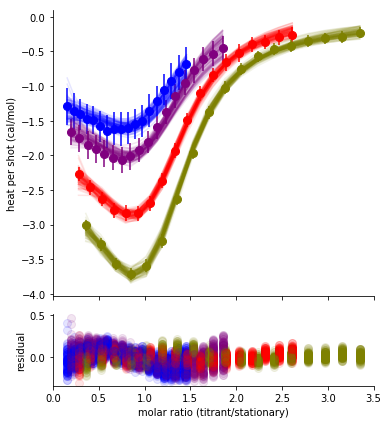

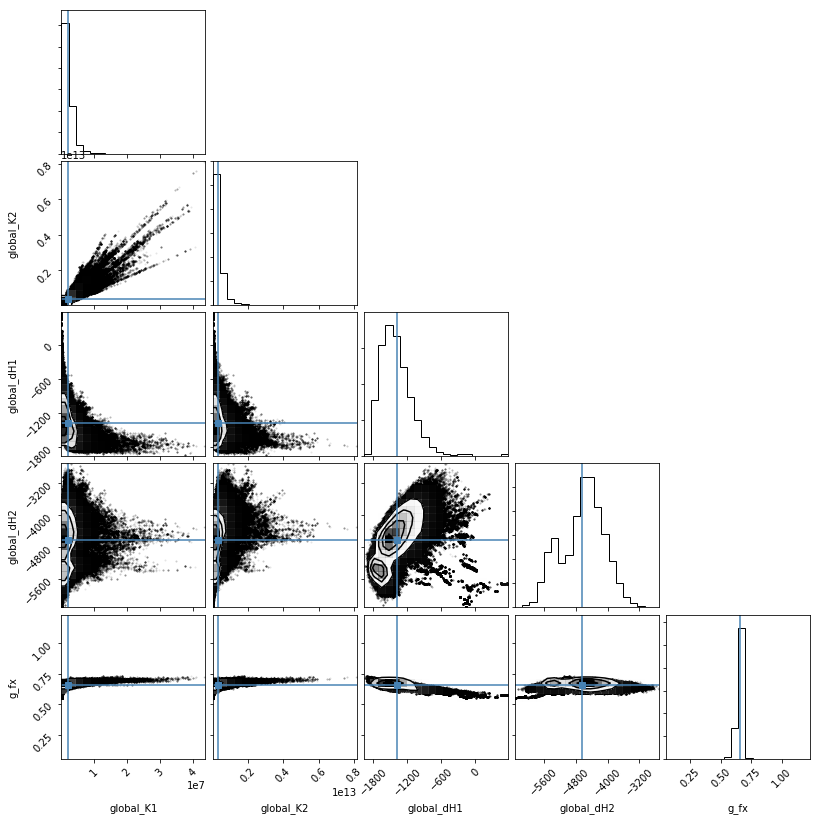

In [1]:
#Two site binding polynomial
%matplotlib inline
import matplotlib.pyplot as plt
import pytc
# --------------------------------------------------------------------
# Create a global fitting instance
p = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding polynomial model
a = pytc.ITCExperiment("hA5C43SC79SCaTESverylowtitrant_8X.sedphat",pytc.indiv_models.BindingPolynomial,num_sites=2,shot_start=2)

b = pytc.ITCExperiment("hA5C43SC79SCaTESlowTitrant_10X.sedphat",pytc.indiv_models.BindingPolynomial,num_sites=2,shot_start=2)

c = pytc.ITCExperiment("hA5C43SC79SCaTESmiditrant_15X.sedphat",pytc.indiv_models.BindingPolynomial,num_sites=2,shot_start=2)
#cblank = pytc.ITCExperiment("hA5C43SC79SCaTESmiditrant_15X.sedphat",pytc.indiv_models.Blank,shot_start=12)

d = pytc.ITCExperiment("hA5C43SC79SCaTESrep1_18X.sedphat",pytc.indiv_models.BindingPolynomial,num_sites=2,shot_start=2)
#dblank = pytc.ITCExperiment("hA5C43SC79SCaTESrep1_18X.sedphat",pytc.indiv_models.Blank,shot_start=10) #shotstart10

# Add the experiment to the fitter.  Then link the dilution heat, 
# intercept, K, and dH to global parameters
p.add_experiment(a)
#p.link_to_global(a,"dilution_heat","global_heat_d")
#p.link_to_global(a,"dilution_intercept","global_intercept_d")

p.link_to_global(a,"beta1","global_K1")
p.link_to_global(a,"beta2","global_K2")
p.link_to_global(a,"dH1","global_dH1")
p.link_to_global(a,"dH2","global_dH2")
p.link_to_global(a,"fx_competent","g_fx")

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model

# Add the experiment to the fitter.  Then link the dilution heat, 
# intercept, K, and dH to global parameters
p.add_experiment(b)
#p.link_to_global(b,"dilution_heat","global_heat_d")
#p.link_to_global(b,"dilution_intercept","global_intercept_d")

p.link_to_global(b,"beta1","global_K1")
p.link_to_global(b,"beta2","global_K2")
p.link_to_global(b,"dH1","global_dH1")
p.link_to_global(b,"dH2","global_dH2")
p.link_to_global(b,"fx_competent","g_fx")

# --------------------------------------------------------------------

# Load in an experimental data set with a single-site binding model

# Add the experiment to the fitter.  Then link the dilution heat, 
# intercept, K, and dH to global parameters
p.add_experiment(c)
#p.add_experiment(cblank)
#p.link_to_global(c,"dilution_heat","global_heat_c")
#p.link_to_global(c,"dilution_intercept","global_intercept_c")
#p.link_to_global(cblank,"dilution_heat","global_heat_c")
#p.link_to_global(cblank,"dilution_intercept","global_intercept_c")


p.link_to_global(c,"beta1","global_K1")
p.link_to_global(c,"beta2","global_K2")
p.link_to_global(c,"dH1","global_dH1")
p.link_to_global(c,"dH2","global_dH2")
p.link_to_global(c,"fx_competent","g_fx")

# --------------------------------------------------------------------

# Add the experiment to the fitter.  Then link the dilution heat, 
# intercept, K, and dH to global parameters
p.add_experiment(d)
#p.add_experiment(dblank)
#p.link_to_global(d,"dilution_heat","global_heat_d")
#p.link_to_global(d,"dilution_intercept","global_intercept_d")
#p.link_to_global(dblank,"dilution_heat","global_heat_d")
#p.link_to_global(dblank,"dilution_intercept","global_intercept_d")

p.link_to_global(d,"beta1","global_K1")
p.link_to_global(d,"beta2","global_K2")
p.link_to_global(d,"dH1","global_dH1")
p.link_to_global(d,"dH2","global_dH2")
p.link_to_global(d,"fx_competent","g_fx")

# --------------------------------------------------------------------


p.update_bounds("dilution_intercept",(-3,0), a)
p.update_bounds("dilution_heat",(0,10000), a)

p.update_bounds("dilution_intercept",(-3,0), b)
p.update_bounds("dilution_heat",(0,10000), b)

p.update_bounds("dilution_intercept",(-3,0), c)
p.update_bounds("dilution_heat",(0,20000), c)

p.update_bounds("dilution_intercept",(-3,0), d)
p.update_bounds("dilution_heat",(0,20000), d)


#p.update_fixed("g_fx", 1.0)

#p.update_bounds("global_dH1",(-15000,15000))
#p.update_bounds("global_dH2",(-15000,15000))


#p.update_bounds("global_K1",(1e+03,1e+08))

p.update_guess("global_dH1", -1e+03) #-1e+03

p.update_guess("global_dH2", -1e+04) #-1e+04

p.update_guess("global_K1", 2e+06) #2e+06

p.update_guess("global_K2", 1e+10) #1e+10

p.update_guess("g_fx", 1.0)

#p.update_guess("global_dH1",(-5000))

#p.update_guess("global_dH1",(5000))



# Fit the data


FP = pytc.fitters.BayesianFitter(num_steps=20000,ml_guess=True,initial_walker_spread=0.0001,burn_in=0.10)
p.fit(FP)
#p.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = p.plot()
plt.savefig("Bayesian_fit-improve-fit.pdf")
c = p.corner_plot()
plt.savefig("corner-plot-improve-fit.pdf")
print(p.fit_as_csv)